# DMET-Hubbard: Density Matrix Embedding Theory for the Hubbard Model

Explore strongly correlated electron systems using DMET applied to the Hubbard Model.

This notebook showcases the application of Density Matrix Embedding Theory (DMET) to the Hubbard Model, demonstrating how DMET can be used to study strongly correlated electron systems within a lattice framework.

## The Hubbard Model Hamiltonian

The Hubbard Model Hamiltonian describes the physics of electrons on a lattice with two main contributions:

- **Kinetic Term ($t$):** Electrons can hop between neighboring lattice sites, represented by the hopping parameter $t$.
- **Interaction Term ($U$):** When two electrons occupy the same site, they experience an on-site repulsion quantified by $U$.

The Hamiltonian is written as:
$$
H = -t \sum_{\langle i, j \rangle, \sigma} (c_{i\sigma}^\dagger c_{j\sigma} + c_{j\sigma}^\dagger c_{i\sigma}) + U \sum_{i} n_{i\uparrow} n_{i\downarrow}
$$

where:
- $c_{i\sigma}^\dagger$ and $c_{i\sigma}$ are the creation and annihilation operators for an electron with spin $\sigma$ at site $i$,
- $n_{i\sigma} = c_{i\sigma}^\dagger c_{i\sigma}$ is the number operator,
- $\langle i, j \rangle$ denotes neighboring sites.

This simple form captures the essential competition between electron mobility and interaction, leading to rich phenomena such as magnetism and metal-insulator transitions.

## Problem Fomulation

### Requirements for Problem Formulation Classes

In our DMET implementation, the problem formulation must include two main components: the one-body problem formulation and the two-body problem formulation.

- **OneBodyProblemFormulation:**  
  This class must provide a function called `get_density_matrix()`, which computes the one-body reduced density matrix for the system. This is essential for DMET, as it provides the electron distribution information needed for embedding calculations.

- **ManyBodyProblemFormulation:**  
  This class must include both the one-body terms and the two-body terms of the Hamiltonian, typically as attributes named `onebody_terms` and `twobody_terms`. These are required for DMET to construct the embedded Hamiltonians for each fragment and to accurately capture electron interactions.

By ensuring these functions and attributes are present, the problem formulation can be seamlessly integrated into DMET calculations, enabling the algorithm to perform quantum embedding and correlation analysis.

### Spin-Orbital Indexing in the Hubbard Formulation

In our package, the Hubbard formulation is defined by explicitly including both spin-up and spin-down states for each lattice site. The orbitals are indexed such that for $L$ lattice sites:
- The $2i$-th orbital corresponds to site $i$ with spin-up ($\uparrow$).
- The $(2i+1)$-th orbital corresponds to site $i$ with spin-down ($\downarrow$).

This means the total number of spin orbitals is $2L$, and the Hamiltonian and all operators are constructed using this indexing scheme. For example, the hopping and interaction terms are written in terms of these spin-orbital indices, allowing us to treat spin and site degrees of freedom in a unified way. This structure is crucial for correctly modeling the physics of the Hubbard model, including magnetic and correlation effects.


In [3]:
from DMET.ProblemFormulation.Hubbard import OneBodyHubbardFormulation, ManyBodyHubbardFormulation
from DMET.ProblemFormulation.ProblemFormulation import ProblemFormulation
L = 120 
t = 1.0
U = 4.0
number_of_electrons = 60
one_body_hubbard = OneBodyHubbardFormulation(L=L, t=t, number_of_electrons=number_of_electrons)
many_body_hubbard = ManyBodyHubbardFormulation(L=L, t=t, U=U)
hubbard_problem = ProblemFormulation()
hubbard_problem.one_body_problem_formulation = one_body_hubbard
hubbard_problem.many_body_problem_formulation = many_body_hubbard

## Define Problem Solver
In this section, we use the classical `EigenSolver` as our problem solver for DMET fragment calculations. However, you are not limited to classical solvers; you can also use other customized or quantum-inspired solvers by defining your own solver class (referred to as a private solver). As long as your solver class implements the required interface (such as a `solve` method that returns energy and density matrices), it can be seamlessly integrated into the DMET workflow.

In [4]:
from DMET.ProblemSolver.ClassicalEigenSolver import EigenSolver
problemsolver = EigenSolver()

## Run DMET
To run DMET, simply create an instance of the DMET class with your problem formulation, fragments, and solver, then call its main function ```run```
### Periodic Boundary Conditions (PBC) in DMET

Periodic boundary conditions (PBC) are commonly used in quantum lattice models to simulate an infinite system by connecting the edges of the lattice. In DMET, enabling PBC allows the algorithm to treat the system as if it wraps around, which is especially useful for studying bulk properties and avoiding edge effects.

To use PBC in DMET, set the `PBC` argument to `True` when creating the DMET instance. Note that all fragments should be equivalent for PBC to be physically meaningful. If fragments are not equivalent, PBC should not be used.

In [5]:
from DMET.DMET import DMET
# Define the size of each fragment
# Create L/2 fragments, each with 2 orbitals (1 lattice site)
fragment_size = 2 
fragments = [[ i+fragment_size*j for  i in range(fragment_size)]for j in range(L//fragment_size*2)]
DMET_instance = DMET(hubbard_problem,fragments=fragments,problem_solver=problemsolver,verbose=True,PBC=True)
energy =  DMET_instance.run(0,-2)

Calculating fragment Hamiltonians...


  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.69949-0.00000j, Number of orbitals: 8, Number of electrons = 0.35377-0.00000j
Total energy: -83.93839-0.00000j, Number of electrons: 42.45202-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.69949-0.00000j, Number of orbitals: 8, Number of electrons = 0.35377-0.00000j
Total energy: -83.93839-0.00000j, Number of electrons: 42.45202-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.67682-0.00000j, Number of orbitals: 8, Number of electrons = 0.79115+0.00000j
Total energy: -81.21897-0.00000j, Number of electrons: 94.93779+0.00000j
---------------------
Shot 3: mu = -0.668675604416588
Fragment 0: Energy = -0.67682-0.00000j, Number of orbitals: 8, Number of electrons = 0.79115+0.00000j
Total energy: -81.21897-0.00000j, Number of electrons: 94.93779+0.00000j
---------------------
Shot 3: mu = -0.668675604416588
Fragment 0: Energy = -0.75853-0.00000j, Number of orbitals: 8, Number of elect

## DMET Energy Analysis

The following section demonstrates how to use DMET to analyze the energy per site as a function of electron number for different interaction strengths $U$ in the Hubbard model. The code scans $U = 1, 4, 8$ and varies the electron number, plotting the resulting DMET energies.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

L = 120
t = 1.0
fragment_size = 2
fragments = [[ i+fragment_size*j for  i in range(fragment_size)]for j in range(L//fragment_size*2)]

results = {U: [] for U in [1, 4, 8]}

for U in [1, 4, 8]:
    for number_of_electrons in range(10, L + 10, 10):
        print(f"\nRunning DMET with U = {U}, number_of_electrons = {number_of_electrons}")
        one_body_hubbard = OneBodyHubbardFormulation(L=L, t=t, number_of_electrons=number_of_electrons)
        many_body_hubbard = ManyBodyHubbardFormulation(L=L, t=t, U=U)
        hubbard_problem = ProblemFormulation()
        hubbard_problem.one_body_problem_formulation = one_body_hubbard
        hubbard_problem.many_body_problem_formulation = many_body_hubbard
        problemsolver = EigenSolver()
        DMET_instance = DMET(
            hubbard_problem,
            fragments=fragments,
            problem_solver=problemsolver,
            verbose=True,
            PBC=True
        )
        try:
            energy = DMET_instance.run(0, -2)
            print(f"DMET energy: {energy}")
            results[U].append((number_of_electrons, energy))
        except Exception as e:
            print(f"Error at U = {U}, N = {number_of_electrons}: {e}")
            results[U].append((number_of_electrons, None))


Running DMET with U = 1, number_of_electrons = 10
Calculating fragment Hamiltonians...
Calculating fragment Hamiltonians...


  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.16269+0.00000j, Number of orbitals: 4, Number of electrons = 0.08094+0.00000j
Total energy: -19.52243+0.00000j, Number of electrons: 9.71239+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.30794-0.00000j, Number of orbitals: 4, Number of electrons = 0.73775-0.00000j
Total energy: -36.95308-0.00000j, Number of electrons: 88.53051-0.00000j
---------------------
Shot 3: mu = -0.007297993583513295
Fragment 0: Energy = -0.16318-0.00000j, Number of orbitals: 4, Number of electrons = 0.08146-0.00000j
Total energy: -19.58168-0.00000j, Number of electrons: 9.77546-0.00000j
---------------------
Shot 4: mu = -0.0332095602961738
Fragment 0: Energy = -0.16495-0.00000j, Number of orbitals: 4, Number of electrons = 0.08337-0.00000j
Total energy: -19.79452-0.00000j, Number of electrons: 10.00405-0.00000j
---------------------
Shot 5: mu = -0.032750527635394315
Fragment 0: Energy = -0.16492-0.00000j, Number of orbital

  0%|          | 0/120 [00:21<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.31680-0.00000j, Number of orbitals: 4, Number of electrons = 0.15799-0.00000j
Total energy: -38.01636-0.00000j, Number of electrons: 18.95845-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.44752-0.00000j, Number of orbitals: 4, Number of electrons = 0.83831+0.00000j
Total energy: -53.70266-0.00000j, Number of electrons: 100.59660+0.00000j
---------------------
Shot 3: mu = -0.02551626433712347
Fragment 0: Energy = -0.31960-0.00000j, Number of orbitals: 4, Number of electrons = 0.16122-0.00000j
Total energy: -38.35222-0.00000j, Number of electrons: 19.34662-0.00000j
---------------------
Shot 4: mu = -0.06812037930814069
Fragment 0: Energy = -0.32434+0.00000j, Number of orbitals: 4, Number of electrons = 0.16682-0.00000j
Total energy: -38.92125+0.00000j, Number of electrons: 20.01804-0.00000j
---------------------
Shot 5: mu = -0.06697546064625583
Fragment 0: Energy = -0.32422+0.00000j, Number of orbit

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.46117+0.00000j, Number of orbitals: 4, Number of electrons = 0.23186-0.00000j
Total energy: -55.34013+0.00000j, Number of electrons: 27.82267-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.55414+0.00000j, Number of orbitals: 4, Number of electrons = 0.91861+0.00000j
Total energy: -66.49684+0.00000j, Number of electrons: 110.23347+0.00000j
---------------------
Shot 3: mu = -0.05284079959160619
Fragment 0: Energy = -0.46817+0.00000j, Number of orbitals: 4, Number of electrons = 0.24083+0.00000j
Total energy: -56.18097+0.00000j, Number of electrons: 28.89909+0.00000j
---------------------
Shot 4: mu = -0.10615269434599103
Fragment 0: Energy = -0.47531+0.00000j, Number of orbitals: 4, Number of electrons = 0.25030-0.00000j
Total energy: -57.03707+0.00000j, Number of electrons: 30.03592-0.00000j
---------------------
Shot 5: mu = -0.10446843104380592
Fragment 0: Energy = -0.47508-0.00000j, Number of orbit

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.55740-0.00000j, Number of orbitals: 8, Number of electrons = 0.28372-0.00000j
Total energy: -66.88761-0.00000j, Number of electrons: 34.04588-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.55740-0.00000j, Number of orbitals: 8, Number of electrons = 0.28372-0.00000j
Total energy: -66.88761-0.00000j, Number of electrons: 34.04588-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.65032+0.00000j, Number of orbitals: 8, Number of electrons = 1.00193+0.00000j
Total energy: -78.03884+0.00000j, Number of electrons: 120.23183+0.00000j
---------------------
Shot 3: mu = -0.1381690893692016
Fragment 0: Energy = -0.65032+0.00000j, Number of orbitals: 8, Number of electrons = 1.00193+0.00000j
Total energy: -78.03884+0.00000j, Number of electrons: 120.23183+0.00000j
---------------------
Shot 3: mu = -0.1381690893692016
Fragment 0: Energy = -0.58772+0.00000j, Number of orbitals: 8, Number of e

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.71527-0.00000j, Number of orbitals: 4, Number of electrons = 0.37343+0.00000j
Total energy: -85.83250-0.00000j, Number of electrons: 44.81117+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.70084-0.00000j, Number of orbitals: 4, Number of electrons = 1.05162+0.00000j
Total energy: -84.10064-0.00000j, Number of electrons: 126.19446+0.00000j
---------------------
Shot 3: mu = -0.1275158969225376
Fragment 0: Energy = -0.73236-0.00000j, Number of orbitals: 4, Number of electrons = 0.40294-0.00000j
Total energy: -87.88294-0.00000j, Number of electrons: 48.35246-0.00000j
---------------------
Shot 4: mu = -0.18558522357292506
Fragment 0: Energy = -0.73985+0.00000j, Number of orbitals: 4, Number of electrons = 0.41712+0.00000j
Total energy: -88.78230+0.00000j, Number of electrons: 50.05476+0.00000j
---------------------
Shot 5: mu = -0.18371714641129955
Fragment 0: Energy = -0.73961-0.00000j, Number of orbita

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.79230-0.00000j, Number of orbitals: 8, Number of electrons = 0.42341+0.00000j
Total energy: -95.07620-0.00000j, Number of electrons: 50.80875+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.79230-0.00000j, Number of orbitals: 8, Number of electrons = 0.42341+0.00000j
Total energy: -95.07620-0.00000j, Number of electrons: 50.80875+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.74863+0.00000j, Number of orbitals: 8, Number of electrons = 1.12598+0.00000j
Total energy: -89.83516+0.00000j, Number of electrons: 135.11814+0.00000j
---------------------
Shot 3: mu = -0.2180361267134955
Fragment 0: Energy = -0.74863+0.00000j, Number of orbitals: 8, Number of electrons = 1.12598+0.00000j
Total energy: -89.83516+0.00000j, Number of electrons: 135.11814+0.00000j
---------------------
Shot 3: mu = -0.2180361267134955
Fragment 0: Energy = -0.82761+0.00000j, Number of orbitals: 8, Number of e

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.91346-0.00000j, Number of orbitals: 4, Number of electrons = 0.50957+0.00000j
Total energy: -109.61469-0.00000j, Number of electrons: 61.14783+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.77208+0.00000j, Number of orbitals: 4, Number of electrons = 1.17017-0.00000j
Total energy: -92.65019+0.00000j, Number of electrons: 140.42051-0.00000j
---------------------
Shot 3: mu = -0.22333470498392474
Fragment 0: Energy = -0.93410+0.00000j, Number of orbitals: 4, Number of electrons = 0.57021+0.00000j
Total energy: -112.09208+0.00000j, Number of electrons: 68.42531+0.00000j
---------------------
Shot 4: mu = -0.27060240861446333
Fragment 0: Energy = -0.93767+0.00000j, Number of orbitals: 4, Number of electrons = 0.58372+0.00000j
Total energy: -112.52028+0.00000j, Number of electrons: 70.04620+0.00000j
---------------------
Shot 5: mu = -0.26925516033571084
Fragment 0: Energy = -0.93757-0.00000j, Number of or

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.96721-0.00000j, Number of orbitals: 8, Number of electrons = 0.55893+0.00000j
Total energy: -116.06483-0.00000j, Number of electrons: 67.07202+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.96721-0.00000j, Number of orbitals: 8, Number of electrons = 0.55893+0.00000j
Total energy: -116.06483-0.00000j, Number of electrons: 67.07202+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.77137+0.00000j, Number of orbitals: 8, Number of electrons = 1.24180-0.00000j
Total energy: -92.56384+0.00000j, Number of electrons: 149.01559-0.00000j
---------------------
Shot 3: mu = -0.31553365696311136
Fragment 0: Energy = -0.77137+0.00000j, Number of orbitals: 8, Number of electrons = 1.24180-0.00000j
Total energy: -92.56384+0.00000j, Number of electrons: 149.01559-0.00000j
---------------------
Shot 3: mu = -0.31553365696311136
Fragment 0: Energy = -1.00555+0.00000j, Number of orbitals: 8, Number 

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -1.04476-0.00000j, Number of orbitals: 4, Number of electrons = 0.64275-0.00000j
Total energy: -125.37143-0.00000j, Number of electrons: 77.12993-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.76997-0.00000j, Number of orbitals: 4, Number of electrons = 1.28214-0.00000j
Total energy: -92.39615-0.00000j, Number of electrons: 153.85649-0.00000j
---------------------
Shot 3: mu = -0.33547882461424355
Fragment 0: Energy = -1.05211+0.00000j, Number of orbitals: 4, Number of electrons = 0.74255-0.00000j
Total energy: -126.25336+0.00000j, Number of electrons: 89.10569-0.00000j
---------------------
Shot 4: mu = -0.36018536511194654
Fragment 0: Energy = -1.05188-0.00000j, Number of orbitals: 4, Number of electrons = 0.75019-0.00000j
Total energy: -126.22512-0.00000j, Number of electrons: 90.02337-0.00000j
---------------------
Shot 5: mu = -0.3595560968496151
Fragment 0: Energy = -1.05188-0.00000j, Number of orb

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -1.07133-0.00000j, Number of orbitals: 8, Number of electrons = 0.69229+0.00000j
Total energy: -128.55923-0.00000j, Number of electrons: 83.07500+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -1.07133-0.00000j, Number of orbitals: 8, Number of electrons = 0.69229+0.00000j
Total energy: -128.55923-0.00000j, Number of electrons: 83.07500+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.71827+0.00000j, Number of orbitals: 8, Number of electrons = 1.35350+0.00000j
Total energy: -86.19263+0.00000j, Number of electrons: 162.42060+0.00000j
---------------------
Shot 3: mu = -0.4266146199455675
Fragment 0: Energy = -0.71827+0.00000j, Number of orbitals: 8, Number of electrons = 1.35350+0.00000j
Total energy: -86.19263+0.00000j, Number of electrons: 162.42060+0.00000j
---------------------
Shot 3: mu = -0.4266146199455675
Fragment 0: Energy = -1.07418+0.00000j, Number of orbitals: 8, Number of

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -1.10023+0.00000j, Number of orbitals: 4, Number of electrons = 0.77480+0.00000j
Total energy: -132.02736+0.00000j, Number of electrons: 92.97572+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.69504+0.00000j, Number of orbitals: 4, Number of electrons = 1.39020-0.00000j
Total energy: -83.40526+0.00000j, Number of electrons: 166.82347-0.00000j
---------------------
Shot 3: mu = -0.4610642099781361
Fragment 0: Energy = -1.06958-0.00000j, Number of orbitals: 4, Number of electrons = 0.91930-0.00000j
Total energy: -128.34974-0.00000j, Number of electrons: 110.31575-0.00000j
---------------------
Shot 4: mu = -0.45266866124249217
Fragment 0: Energy = -1.07051+0.00000j, Number of orbitals: 4, Number of electrons = 0.91661-0.00000j
Total energy: -128.46145+0.00000j, Number of electrons: 109.99323-0.00000j
---------------------
Shot 5: mu = -0.45284486722174155
Fragment 0: Energy = -1.07049-0.00000j, Number of o

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -1.09648+0.00000j, Number of orbitals: 8, Number of electrons = 0.82513+0.00000j
Total energy: -131.57817+0.00000j, Number of electrons: 99.01600+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -1.09648+0.00000j, Number of orbitals: 8, Number of electrons = 0.82513+0.00000j
Total energy: -131.57817+0.00000j, Number of electrons: 99.01600+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.59016-0.00000j, Number of orbitals: 8, Number of electrons = 1.46272+0.00000j
Total energy: -70.81884-0.00000j, Number of electrons: 175.52634+0.00000j
---------------------
Shot 3: mu = -0.5485271951380536
Fragment 0: Energy = -0.59016-0.00000j, Number of orbitals: 8, Number of electrons = 1.46272+0.00000j
Total energy: -70.81884-0.00000j, Number of electrons: 175.52634+0.00000j
---------------------
Shot 3: mu = -0.5485271951380536
Fragment 0: Energy = -1.02560+0.00000j, Number of orbitals: 8, Number of

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.15852+0.00000j, Number of orbitals: 4, Number of electrons = 0.07793+0.00000j
Total energy: -19.02181+0.00000j, Number of electrons: 9.35163+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.29305+0.00000j, Number of orbitals: 4, Number of electrons = 0.58501+0.00000j
Total energy: -35.16611+0.00000j, Number of electrons: 70.20164+0.00000j
---------------------
Shot 3: mu = -0.02131056200637654
Fragment 0: Energy = -0.15985-0.00000j, Number of orbitals: 4, Number of electrons = 0.07936+0.00000j
Total energy: -19.18175-0.00000j, Number of electrons: 9.52328+0.00000j
---------------------
Shot 4: mu = -0.08002975930593909
Fragment 0: Energy = -0.16361+0.00000j, Number of orbitals: 4, Number of electrons = 0.08349+0.00000j
Total energy: -19.63373+0.00000j, Number of electrons: 10.01927+0.00000j
---------------------
Shot 5: mu = -0.07774848229190245
Fragment 0: Energy = -0.16347-0.00000j, Number of orbitals

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.30228+0.00000j, Number of orbitals: 4, Number of electrons = 0.14740-0.00000j
Total energy: -36.27335+0.00000j, Number of electrons: 17.68757-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.41680+0.00000j, Number of orbitals: 4, Number of electrons = 0.63055+0.00000j
Total energy: -50.01605+0.00000j, Number of electrons: 75.66624+0.00000j
---------------------
Shot 3: mu = -0.07976834552201659
Fragment 0: Energy = -0.30984+0.00000j, Number of orbitals: 4, Number of electrons = 0.15638+0.00000j
Total energy: -37.18026+0.00000j, Number of electrons: 18.76575+0.00000j
---------------------
Shot 4: mu = -0.16910212612392242
Fragment 0: Energy = -0.31851+0.00000j, Number of orbitals: 4, Number of electrons = 0.16727-0.00000j
Total energy: -38.22172+0.00000j, Number of electrons: 20.07183-0.00000j
---------------------
Shot 5: mu = -0.1641893226069206
Fragment 0: Energy = -0.31803+0.00000j, Number of orbital

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.43192-0.00000j, Number of orbitals: 4, Number of electrons = 0.21012+0.00000j
Total energy: -51.83069-0.00000j, Number of electrons: 25.21493+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.50901+0.00000j, Number of orbitals: 4, Number of electrons = 0.67093+0.00000j
Total energy: -61.08148+0.00000j, Number of electrons: 80.51197+0.00000j
---------------------
Shot 3: mu = -0.17306793958088548
Fragment 0: Energy = -0.45026+0.00000j, Number of orbitals: 4, Number of electrons = 0.23518+0.00000j
Total energy: -54.03144+0.00000j, Number of electrons: 28.22186+0.00000j
---------------------
Shot 4: mu = -0.27193053799468636
Fragment 0: Energy = -0.46068-0.00000j, Number of orbitals: 4, Number of electrons = 0.25095-0.00000j
Total energy: -55.28129-0.00000j, Number of electrons: 30.11385-0.00000j
---------------------
Shot 5: mu = -0.2659814907981218
Fragment 0: Energy = -0.46005-0.00000j, Number of orbital

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.49809-0.00000j, Number of orbitals: 8, Number of electrons = 0.24456-0.00000j
Total energy: -59.77032-0.00000j, Number of electrons: 29.34729-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.49809-0.00000j, Number of orbitals: 8, Number of electrons = 0.24456-0.00000j
Total energy: -59.77032-0.00000j, Number of electrons: 29.34729-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.59212+0.00000j, Number of orbitals: 8, Number of electrons = 0.71714-0.00000j
Total energy: -71.05485+0.00000j, Number of electrons: 86.05700-0.00000j
---------------------
Shot 3: mu = -0.3756926303529841
Fragment 0: Energy = -0.59212+0.00000j, Number of orbitals: 8, Number of electrons = 0.71714-0.00000j
Total energy: -71.05485+0.00000j, Number of electrons: 86.05700-0.00000j
---------------------
Shot 3: mu = -0.3756926303529841
Fragment 0: Energy = -0.56137-0.00000j, Number of orbitals: 8, Number of ele

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.65092+0.00000j, Number of orbitals: 4, Number of electrons = 0.32264+0.00000j
Total energy: -78.11011+0.00000j, Number of electrons: 38.71634+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.63474-0.00000j, Number of orbitals: 4, Number of electrons = 0.74646+0.00000j
Total energy: -76.16932-0.00000j, Number of electrons: 89.57548+0.00000j
---------------------
Shot 3: mu = -0.44372196338304665
Fragment 0: Energy = -0.68763-0.00000j, Number of orbitals: 4, Number of electrons = 0.40381-0.00000j
Total energy: -82.51582-0.00000j, Number of electrons: 48.45661-0.00000j
---------------------
Shot 4: mu = -0.5113928583142562
Fragment 0: Energy = -0.69187+0.00000j, Number of orbitals: 4, Number of electrons = 0.41740-0.00000j
Total energy: -83.02396+0.00000j, Number of electrons: 50.08796-0.00000j
---------------------
Shot 5: mu = -0.507744183601164
Fragment 0: Energy = -0.69165-0.00000j, Number of orbitals:

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.69949+0.00000j, Number of orbitals: 8, Number of electrons = 0.35377+0.00000j
Total energy: -83.93839+0.00000j, Number of electrons: 42.45202+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.69949+0.00000j, Number of orbitals: 8, Number of electrons = 0.35377+0.00000j
Total energy: -83.93839+0.00000j, Number of electrons: 42.45202+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.67682+0.00000j, Number of orbitals: 8, Number of electrons = 0.79115+0.00000j
Total energy: -81.21897+0.00000j, Number of electrons: 94.93779+0.00000j
---------------------
Shot 3: mu = -0.6686756044165924
Fragment 0: Energy = -0.67682+0.00000j, Number of orbitals: 8, Number of electrons = 0.79115+0.00000j
Total energy: -81.21897+0.00000j, Number of electrons: 94.93779+0.00000j
---------------------
Shot 3: mu = -0.6686756044165924
Fragment 0: Energy = -0.75853-0.00000j, Number of orbitals: 8, Number of ele

  0%|          | 0/120 [00:20<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.81347+0.00000j, Number of orbitals: 4, Number of electrons = 0.42296+0.00000j
Total energy: -97.61700+0.00000j, Number of electrons: 50.75499+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.69435-0.00000j, Number of orbitals: 4, Number of electrons = 0.81951+0.00000j
Total energy: -83.32158-0.00000j, Number of electrons: 98.34132+0.00000j
---------------------
Shot 3: mu = -0.8088462252504692
Fragment 0: Energy = -0.82894+0.00000j, Number of orbitals: 4, Number of electrons = 0.58119-0.00000j
Total energy: -99.47304+0.00000j, Number of electrons: 69.74263-0.00000j
---------------------
Shot 4: mu = -0.8197111720061632
Fragment 0: Energy = -0.82860-0.00000j, Number of orbitals: 4, Number of electrons = 0.58342-0.00000j
Total energy: -99.43214-0.00000j, Number of electrons: 70.01065-0.00000j
---------------------
Shot 5: mu = -0.8192794671135684
Fragment 0: Energy = -0.82862+0.00000j, Number of orbitals:

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.84381+0.00000j, Number of orbitals: 8, Number of electrons = 0.45263+0.00000j
Total energy: -101.25771+0.00000j, Number of electrons: 54.31620+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.84381+0.00000j, Number of orbitals: 8, Number of electrons = 0.45263+0.00000j
Total energy: -101.25771+0.00000j, Number of electrons: 54.31620+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.69634+0.00000j, Number of orbitals: 8, Number of electrons = 0.86389-0.00000j
Total energy: -83.56127+0.00000j, Number of electrons: 103.66726-0.00000j
---------------------
Shot 3: mu = -1.0408610683131465
Fragment 0: Energy = -0.69634+0.00000j, Number of orbitals: 8, Number of electrons = 0.86389-0.00000j
Total energy: -83.56127+0.00000j, Number of electrons: 103.66726-0.00000j
---------------------
Shot 3: mu = -1.0408610683131465
Fragment 0: Energy = -0.84296+0.00000j, Number of orbitals: 8, Number of

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.91545-0.00000j, Number of orbitals: 4, Number of electrons = 0.51492-0.00000j
Total energy: -109.85350-0.00000j, Number of electrons: 61.79011-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.68829-0.00000j, Number of orbitals: 4, Number of electrons = 0.89183-0.00000j
Total energy: -82.59530-0.00000j, Number of electrons: 107.01964-0.00000j
---------------------
Shot 3: mu = -1.2474101628879173
Fragment 0: Energy = -0.83652-0.00000j, Number of orbitals: 4, Number of electrons = 0.75483-0.00000j
Total energy: -100.38212-0.00000j, Number of electrons: 90.57996-0.00000j
---------------------
Shot 4: mu = -1.2213951074597091
Fragment 0: Energy = -0.84028-0.00000j, Number of orbitals: 4, Number of electrons = 0.74992-0.00000j
Total energy: -100.83386-0.00000j, Number of electrons: 89.98982-0.00000j
---------------------
Shot 5: mu = -1.2218440492389848
Fragment 0: Energy = -0.84022+0.00000j, Number of orbit

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.92573+0.00000j, Number of orbitals: 8, Number of electrons = 0.54380-0.00000j
Total energy: -111.08705+0.00000j, Number of electrons: 65.25541-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.92573+0.00000j, Number of orbitals: 8, Number of electrons = 0.54380-0.00000j
Total energy: -111.08705+0.00000j, Number of electrons: 65.25541-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.64915+0.00000j, Number of orbitals: 8, Number of electrons = 0.93612-0.00000j
Total energy: -77.89839+0.00000j, Number of electrons: 112.33476-0.00000j
---------------------
Shot 3: mu = -1.4760012552096518
Fragment 0: Energy = -0.64915+0.00000j, Number of orbitals: 8, Number of electrons = 0.93612-0.00000j
Total energy: -77.89839+0.00000j, Number of electrons: 112.33476-0.00000j
---------------------
Shot 3: mu = -1.4760012552096518
Fragment 0: Energy = -0.78951-0.00000j, Number of orbitals: 8, Number of

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.95340-0.00000j, Number of orbitals: 4, Number of electrons = 0.60055+0.00000j
Total energy: -114.40765-0.00000j, Number of electrons: 72.06549+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.61407+0.00000j, Number of orbitals: 4, Number of electrons = 0.96395+0.00000j
Total energy: -73.68866+0.00000j, Number of electrons: 115.67459+0.00000j
---------------------
Shot 3: mu = -1.739752149949483
Fragment 0: Energy = -0.68904-0.00000j, Number of orbitals: 4, Number of electrons = 0.91938-0.00000j
Total energy: -82.68510-0.00000j, Number of electrons: 110.32556-0.00000j
---------------------
Shot 4: mu = -1.724047317967944
Fragment 0: Energy = -0.69325-0.00000j, Number of orbitals: 4, Number of electrons = 0.91667-0.00000j
Total energy: -83.19054-0.00000j, Number of electrons: 110.00063-0.00000j
---------------------
Shot 5: mu = -1.7239561156020458
Fragment 0: Energy = -0.69328-0.00000j, Number of orbital

  0%|          | 0/120 [00:18<?, ?it/s]


----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.94208+0.00000j, Number of orbitals: 8, Number of electrons = 0.62881-0.00000j
Total energy: -113.04901+0.00000j, Number of electrons: 75.45693-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.94208+0.00000j, Number of orbitals: 8, Number of electrons = 0.62881-0.00000j
Total energy: -113.04901+0.00000j, Number of electrons: 75.45693-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.54927-0.00000j, Number of orbitals: 8, Number of electrons = 1.00000-0.00000j
Total energy: -65.91225-0.00000j, Number of electrons: 120.00000-0.00000j
---------------------
Shot 3: mu = -1.999895
Fragment 0: Energy = -0.54927-0.00000j, Number of orbitals: 8, Number of electrons = 1.00000-0.00000j
Total energy: -65.91225-0.00000j, Number of electrons: 120.00000-0.00000j
---------------------
Shot 3: mu = -1.999895
Fragment 0: Energy = -0.54930-0.00000j, Number of orbitals: 8, Number of electrons = 0.99998

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.15675+0.00000j, Number of orbitals: 4, Number of electrons = 0.07655-0.00000j
Total energy: -18.81002+0.00000j, Number of electrons: 9.18641-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.29270+0.00000j, Number of orbitals: 4, Number of electrons = 0.56004-0.00000j
Total energy: -35.12394+0.00000j, Number of electrons: 67.20491-0.00000j
---------------------
Shot 3: mu = -0.028045786886232774
Fragment 0: Energy = -0.15846-0.00000j, Number of orbitals: 4, Number of electrons = 0.07838-0.00000j
Total energy: -19.01505-0.00000j, Number of electrons: 9.40603-0.00000j
---------------------
Shot 4: mu = -0.10311904336099785
Fragment 0: Energy = -0.16318-0.00000j, Number of orbitals: 4, Number of electrons = 0.08359+0.00000j
Total energy: -19.58168-0.00000j, Number of electrons: 10.03052+0.00000j
---------------------
Shot 5: mu = -0.09945003099958469
Fragment 0: Energy = -0.16294+0.00000j, Number of orbital

  0%|          | 0/120 [00:19<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.29637+0.00000j, Number of orbitals: 4, Number of electrons = 0.14270-0.00000j
Total energy: -35.56454+0.00000j, Number of electrons: 17.12445-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.41656-0.00000j, Number of orbitals: 4, Number of electrons = 0.59184-0.00000j
Total energy: -49.98747-0.00000j, Number of electrons: 71.02024-0.00000j
---------------------
Shot 3: mu = -0.10670774514243192
Fragment 0: Energy = -0.30604-0.00000j, Number of orbitals: 4, Number of electrons = 0.15419-0.00000j
Total energy: -36.72447-0.00000j, Number of electrons: 18.50244-0.00000j
---------------------
Shot 4: mu = -0.21936781238778616
Fragment 0: Energy = -0.31656-0.00000j, Number of orbitals: 4, Number of electrons = 0.16757-0.00000j
Total energy: -37.98680-0.00000j, Number of electrons: 20.10858-0.00000j
---------------------
Shot 5: mu = -0.2117519521512597
Fragment 0: Energy = -0.31584+0.00000j, Number of orbital

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.42044-0.00000j, Number of orbitals: 4, Number of electrons = 0.20075-0.00000j
Total energy: -50.45327-0.00000j, Number of electrons: 24.09000-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.51007+0.00000j, Number of orbitals: 4, Number of electrons = 0.61885-0.00000j
Total energy: -61.20804+0.00000j, Number of electrons: 74.26198-0.00000j
---------------------
Shot 3: mu = -0.235589611029576
Fragment 0: Energy = -0.44385-0.00000j, Number of orbitals: 4, Number of electrons = 0.23289-0.00000j
Total energy: -53.26191-0.00000j, Number of electrons: 27.94664-0.00000j
---------------------
Shot 4: mu = -0.35546139521938047
Fragment 0: Energy = -0.45561+0.00000j, Number of orbitals: 4, Number of electrons = 0.25132-0.00000j
Total energy: -54.67293+0.00000j, Number of electrons: 30.15828-0.00000j
---------------------
Shot 5: mu = -0.34688247766118957
Fragment 0: Energy = -0.45477+0.00000j, Number of orbitals

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.47244-0.00000j, Number of orbitals: 8, Number of electrons = 0.22790-0.00000j
Total energy: -56.69322-0.00000j, Number of electrons: 27.34823-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.47244-0.00000j, Number of orbitals: 8, Number of electrons = 0.22790-0.00000j
Total energy: -56.69322-0.00000j, Number of electrons: 27.34823-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.59676-0.00000j, Number of orbitals: 8, Number of electrons = 0.65042+0.00000j
Total energy: -71.61096-0.00000j, Number of electrons: 78.05066+0.00000j
---------------------
Shot 3: mu = -0.4990595846141487
Fragment 0: Energy = -0.59676-0.00000j, Number of orbitals: 8, Number of electrons = 0.65042+0.00000j
Total energy: -71.61096-0.00000j, Number of electrons: 78.05066+0.00000j
---------------------
Shot 3: mu = -0.4990595846141487
Fragment 0: Energy = -0.54989-0.00000j, Number of orbitals: 8, Number of ele

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.62738-0.00000j, Number of orbitals: 4, Number of electrons = 0.30168-0.00000j
Total energy: -75.28507-0.00000j, Number of electrons: 36.20210-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.64320+0.00000j, Number of orbitals: 4, Number of electrons = 0.67018+0.00000j
Total energy: -77.18378+0.00000j, Number of electrons: 80.42191+0.00000j
---------------------
Shot 3: mu = -0.6240597950757726
Fragment 0: Energy = -0.67238-0.00000j, Number of orbitals: 4, Number of electrons = 0.40614-0.00000j
Total energy: -80.68544-0.00000j, Number of electrons: 48.73673-0.00000j
---------------------
Shot 4: mu = -0.6844466756867059
Fragment 0: Energy = -0.67522-0.00000j, Number of orbitals: 4, Number of electrons = 0.41735-0.00000j
Total energy: -81.02657-0.00000j, Number of electrons: 50.08188-0.00000j
---------------------
Shot 5: mu = -0.6807710946351436
Fragment 0: Energy = -0.67506+0.00000j, Number of orbitals:

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.66341-0.00000j, Number of orbitals: 8, Number of electrons = 0.32585-0.00000j
Total energy: -79.60961-0.00000j, Number of electrons: 39.10184-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.66341-0.00000j, Number of orbitals: 8, Number of electrons = 0.32585-0.00000j
Total energy: -79.60961-0.00000j, Number of electrons: 39.10184-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.69426-0.00000j, Number of orbitals: 8, Number of electrons = 0.70044-0.00000j
Total energy: -83.31103-0.00000j, Number of electrons: 84.05280-0.00000j
---------------------
Shot 3: mu = -0.9298205342386434
Fragment 0: Energy = -0.69426-0.00000j, Number of orbitals: 8, Number of electrons = 0.70044-0.00000j
Total energy: -83.31103-0.00000j, Number of electrons: 84.05280-0.00000j
---------------------
Shot 3: mu = -0.9298205342386434
Fragment 0: Energy = -0.73086+0.00000j, Number of orbitals: 8, Number of ele

  0%|          | 0/120 [00:18<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.77977-0.00000j, Number of orbitals: 4, Number of electrons = 0.38860-0.00000j
Total energy: -93.57292-0.00000j, Number of electrons: 46.63154-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.71965-0.00000j, Number of orbitals: 4, Number of electrons = 0.71917-0.00000j
Total energy: -86.35771-0.00000j, Number of electrons: 86.30007-0.00000j
---------------------
Shot 3: mu = -1.178186183827528
Fragment 0: Energy = -0.78959+0.00000j, Number of orbitals: 4, Number of electrons = 0.58822+0.00000j
Total energy: -94.75063+0.00000j, Number of electrons: 70.58656+0.00000j
---------------------
Shot 4: mu = -1.1482605779674477
Fragment 0: Energy = -0.79101+0.00000j, Number of orbitals: 4, Number of electrons = 0.58309-0.00000j
Total energy: -94.92061+0.00000j, Number of electrons: 69.97138-0.00000j
---------------------
Shot 5: mu = -1.1496530221772465
Fragment 0: Energy = -0.79094-0.00000j, Number of orbitals: 

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.80092-0.00000j, Number of orbitals: 8, Number of electrons = 0.41187-0.00000j
Total energy: -96.11032-0.00000j, Number of electrons: 49.42479-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.80092-0.00000j, Number of orbitals: 8, Number of electrons = 0.41187-0.00000j
Total energy: -96.11032-0.00000j, Number of electrons: 49.42479-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.73225+0.00000j, Number of orbitals: 8, Number of electrons = 0.73903+0.00000j
Total energy: -87.87005+0.00000j, Number of electrons: 88.68382+0.00000j
---------------------
Shot 3: mu = -1.5576139906837982
Fragment 0: Energy = -0.73225+0.00000j, Number of orbitals: 8, Number of electrons = 0.73903+0.00000j
Total energy: -87.87005+0.00000j, Number of electrons: 88.68382+0.00000j
---------------------
Shot 3: mu = -1.5576139906837982
Fragment 0: Energy = -0.78010-0.00000j, Number of orbitals: 8, Number of ele

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.87652+0.00000j, Number of orbitals: 4, Number of electrons = 0.46615-0.00000j
Total energy: -105.18261+0.00000j, Number of electrons: 55.93777-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.74365+0.00000j, Number of orbitals: 4, Number of electrons = 0.76657-0.00000j
Total energy: -89.23810+0.00000j, Number of electrons: 91.98839-0.00000j
---------------------
Shot 3: mu = -1.8896889500667273
Fragment 0: Energy = -0.75892-0.00000j, Number of orbitals: 4, Number of electrons = 0.75271-0.00000j
Total energy: -91.07098-0.00000j, Number of electrons: 90.32487-0.00000j
---------------------
Shot 4: mu = -1.868349734053972
Fragment 0: Energy = -0.76180-0.00000j, Number of orbitals: 4, Number of electrons = 0.74998-0.00000j
Total energy: -91.41603-0.00000j, Number of electrons: 89.99702-0.00000j
---------------------
Shot 5: mu = -1.8685436676725276
Fragment 0: Energy = -0.76177+0.00000j, Number of orbitals:

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.88180+0.00000j, Number of orbitals: 8, Number of electrons = 0.48913-0.00000j
Total energy: -105.81619+0.00000j, Number of electrons: 58.69519-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.88180+0.00000j, Number of orbitals: 8, Number of electrons = 0.48913-0.00000j
Total energy: -105.81619+0.00000j, Number of electrons: 58.69519-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.73483+0.00000j, Number of orbitals: 8, Number of electrons = 0.78475+0.00000j
Total energy: -88.17928+0.00000j, Number of electrons: 94.17022+0.00000j
---------------------
Shot 3: mu = -4
Fragment 0: Energy = -0.73483+0.00000j, Number of orbitals: 8, Number of electrons = 0.78475+0.00000j
Total energy: -88.17928+0.00000j, Number of electrons: 94.17022+0.00000j
---------------------
Shot 3: mu = -4
Fragment 0: Energy = -0.32307+0.00000j, Number of orbitals: 8, Number of electrons = 0.97386-0.00000j
Total 

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.91661-0.00000j, Number of orbitals: 4, Number of electrons = 0.53696+0.00000j
Total energy: -109.99344-0.00000j, Number of electrons: 64.43552+0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.71706-0.00000j, Number of orbitals: 4, Number of electrons = 0.81225+0.00000j
Total energy: -86.04714-0.00000j, Number of electrons: 97.46959+0.00000j
---------------------
Shot 3: mu = -4
Fragment 0: Energy = -0.29321-0.00000j, Number of orbitals: 4, Number of electrons = 0.98456-0.00000j
Total energy: -35.18487-0.00000j, Number of electrons: 118.14698-0.00000j
---------------------
Shot 4: mu = -3.2119914293090503
Fragment 0: Energy = -0.48538-0.00000j, Number of orbitals: 4, Number of electrons = 0.92476+0.00000j
Total energy: -58.24506-0.00000j, Number of electrons: 110.97080+0.00000j
---------------------
Shot 5: mu = -3.1130541590077168
Fragment 0: Energy = -0.50685+0.00000j, Number of orbitals: 4, Number of 

  0%|          | 0/120 [00:17<?, ?it/s]



----------------------
Shot 1: mu = 0
Fragment 0: Energy = -0.90502+0.00000j, Number of orbitals: 8, Number of electrons = 0.55978-0.00000j
Total energy: -108.60220+0.00000j, Number of electrons: 67.17340-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.90502+0.00000j, Number of orbitals: 8, Number of electrons = 0.55978-0.00000j
Total energy: -108.60220+0.00000j, Number of electrons: 67.17340-0.00000j
---------------------
Shot 2: mu = -2
Fragment 0: Energy = -0.68985+0.00000j, Number of orbitals: 8, Number of electrons = 0.82916+0.00000j
Total energy: -82.78149+0.00000j, Number of electrons: 99.49885+0.00000j
---------------------
Shot 3: mu = -4
Fragment 0: Energy = -0.68985+0.00000j, Number of orbitals: 8, Number of electrons = 0.82916+0.00000j
Total energy: -82.78149+0.00000j, Number of electrons: 99.49885+0.00000j
---------------------
Shot 3: mu = -4
Fragment 0: Energy = -0.23385+0.00000j, Number of orbitals: 8, Number of electrons = 1.00000+0.00000j
Total 

### Plotting

/Users/ycchung/研究code/DMET-Hubbard/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ycchung/研究code/DMET-Hubbard/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


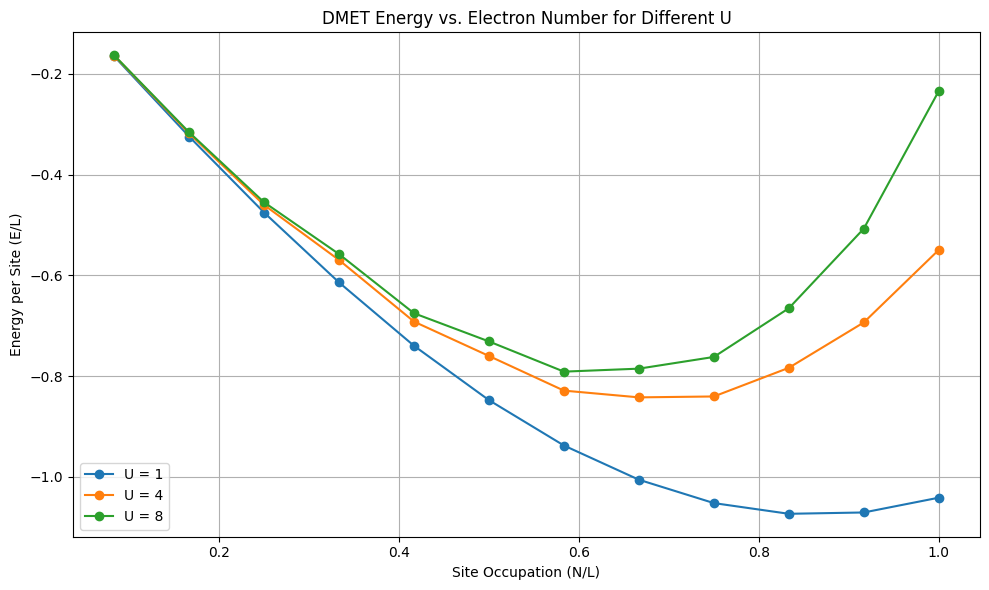

In [ ]:
plt.figure(figsize=(10, 6))
for U, data in results.items():
    xs = np.array([x for x, y in data if y is not None])
    ys = np.array([y for x, y in data if y is not None])
    plt.plot(xs/L, ys/L, marker='o', label=f'U = {U}')
plt.xlabel("Site Occupation (N/L)")
plt.ylabel("Energy per Site (E/L)")
plt.title("DMET Energy vs. Electron Number for Different U")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()